# Calculating Laser Beam Size from Focal Length of Colimating Lens

Updated on April 30th 2019

## Theory

This just comes from gaussian beam propagation. The laser light expands out of the fiber because it is confined so tightly. The spot size is just the natural size of the expanding gaussian beam when it hits the collimating lens.

The waist as a function of position is:
$$
w^2\{z\} = w_0^2 \sqrt{1+\Big(\frac{z}{z_r}\Big)^2} = w_0^2 \Bigg(1+\Big(\frac{\lambda z}{\pi w_0^2}\Big)^2\Bigg)
$$

The spec typically quoted for fibers it the "**mode field diameter**", which strictly speaking is just defined as the point where the field in the mode drops to it's $1/e^2$ value. We will approximate the mode as gaussian, and in this approximation the mode field diameter is exactly the 2-times the Gaussian beam waist.

Most of our fibers come from oz optics or thorlabs. Oz specs the fibers that we use as having a MFD of $5.5\pm1$, and thorlabs specs the fibers as having $5.3\pm1$. Evidently this varies a lot, so the default in the function below is just 5.4

## Calculation

In [1]:
def collimatedWaist(focalLength, wavelength=780e-9, coreModeFieldDiameter=5.4e-6):
    wz = coreModeFieldDiameter/2 * np.sqrt(1+(wavelength*focalLength/(np.pi*(coreModeFieldDiameter/2)**2))**2)
    return wz

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Miscellaneous as misc
%matplotlib inline

In [3]:
from typing import NamedTuple

class LensInfo(NamedTuple):
    focalLength: float
    color: str
    ls: str

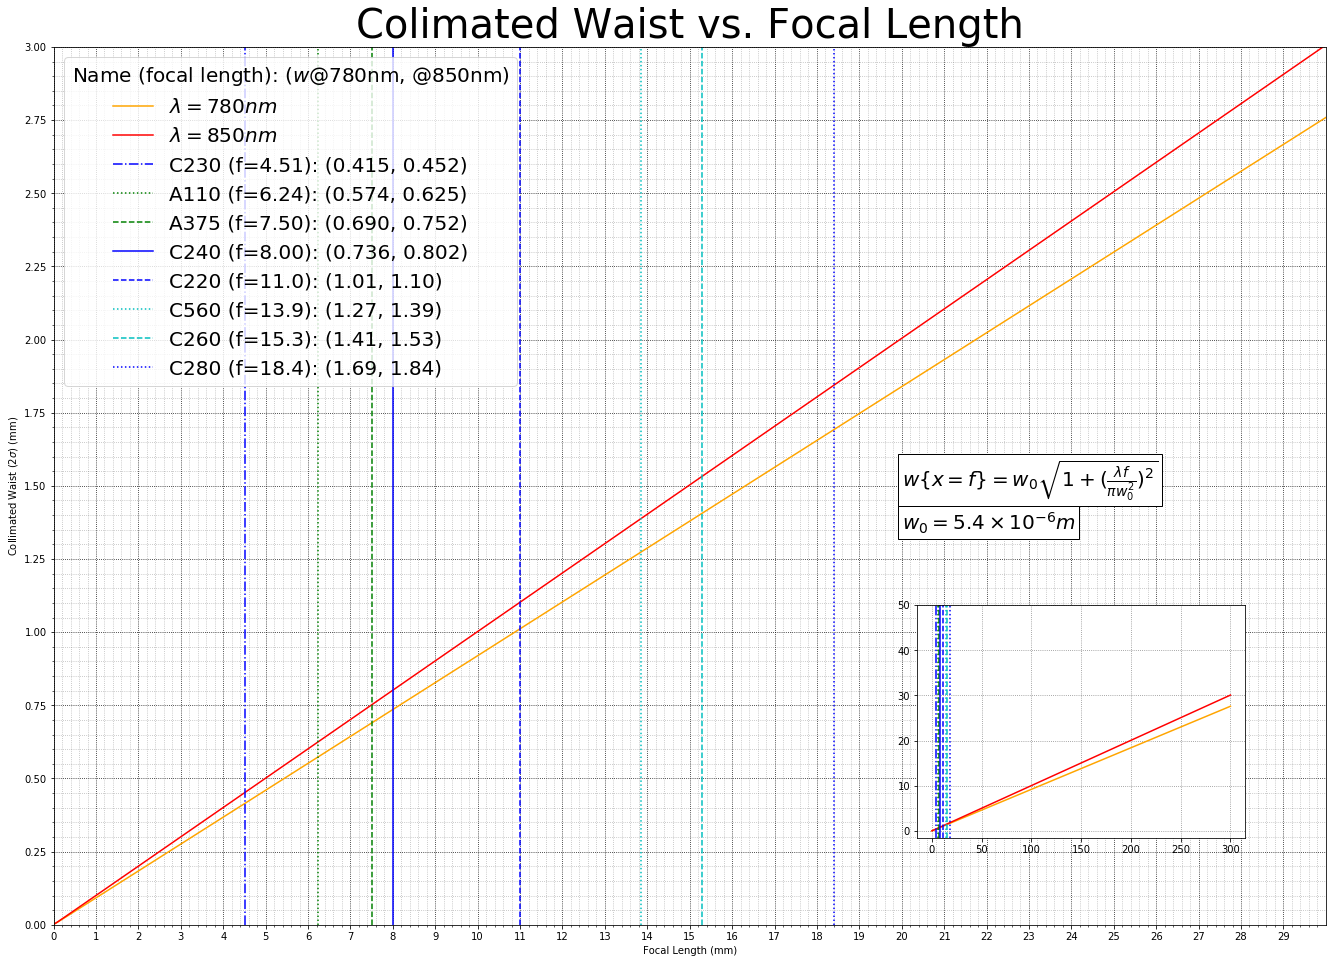

In [56]:
focalLengths = np.linspace(0,3e-2,1000)

colWaists780 = collimatedWaist(focalLengths)
colWaists850 = collimatedWaist(focalLengths, wavelength=850e-9)

longFocalLengths = np.linspace(0,30e-2,1000)
longColWaists780 = collimatedWaist(longFocalLengths)
longColWaists850 = collimatedWaist(longFocalLengths, wavelength=850e-9)
# focal lengths of common aspheres
lenses = {'C230': LensInfo(4.51e-3, 'b', '-.'), 'C240': LensInfo(8e-3,'b','-'), 
          'C280': LensInfo(18.4e-3, 'b', ':'), 'C220': LensInfo(11e-3, 'b','--'), 
          'A110': LensInfo(6.24e-3, 'g', ':'), 'A375': LensInfo(7.5e-3, 'g','--'),
          'C560': LensInfo(13.86e-3,'c',':'), 'C260': LensInfo(15.29e-3, 'c','--')}
lensesSorted = sorted(lenses.items(), key=lambda item: item[1].focalLength)    # Python 3
fig, ax1 = plt.subplots(figsize=(12*1.9,8.5*1.9))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.651, 0.2, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(focalLengths*1e3, colWaists780*1e3, color='#FFA500', label='$\lambda=780nm$')
ax1.plot(focalLengths*1e3, colWaists850*1e3, 'r', label='$\lambda=850nm$')
ax1.set_xlabel('Focal Length (mm)')
ax1.set_ylabel('Collimated Waist (2$\sigma$) (mm)')
ax2.plot(longFocalLengths*1e3, longColWaists780*1e3, color='#FFA500', label='$\lambda=780nm$')
ax2.plot(longFocalLengths*1e3, longColWaists850*1e3, 'r', label='$\lambda=850nm$')
ax1.yaxis.set_ticks(np.arange(0,3.25,0.25))
ax1.xaxis.set_ticks(np.arange(0,30,1))
ax2.yaxis.set_ticks(np.arange(0,60,10))
ax2.xaxis.set_ticks(np.arange(0,301,50))

for ax in [ax1, ax2]:
    for lensItem in lensesSorted:
        name, lens = lensItem
        ax.axvline(lens.focalLength*1e3, linestyle=lens.ls, label=name + ' (f=' + misc.round_sig_str(lens.focalLength*1e3) + '): (' 
                   + misc.round_sig_str(collimatedWaist(lens.focalLength)*1e3) + ', ' + misc.round_sig_str(collimatedWaist(lens.focalLength, 850e-9)*1e3)
                   + ')', color=lens.color)
    
ax1.legend(loc='upper left', fancybox=True, framealpha=0.8, frameon=True, fontsize=20, title='Name (focal length): ($w$@780nm, @850nm)',title_fontsize=20)
ax1.set_title('Colimated Waist vs. Focal Length', fontsize=40);
ax1.set_xlim(0,30)
ax1.grid(True, which='major', color='k', linestyle=':',alpha=1)
ax1.grid(True, which='minor', color='k', linestyle=':',alpha=0.3)
ax2.grid(True, which='major', color='k', linestyle=':',alpha=0.5)
ax1.minorticks_on()
ax1.set_ylim(0,3)
ax1.text(20,1.5,r'$w\{x=f\}=w_0\sqrt{1+(\frac{\lambda f}{\pi w_0^2})^2}$', fontsize=20, bbox=dict(facecolor='w'));
ax1.text(20,1.35,r'$w_0 = 5.4\times10^{-6} m$', fontsize=20, bbox=dict(facecolor='w'));

#fig.suptitle('Colimated Waist vs. Focal Length', fontsize=40);

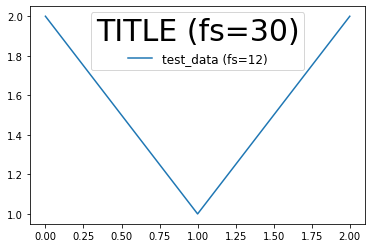

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([0,1,2],[2,1,2],label='test_data (fs=12)')
ax.legend(fontsize=12, title='TITLE (fs=30)',title_fontsize=30)

# Focused Spot Size As a function of initial size and lens focal length

from fourier transform rules:
$$w_0 = \frac{\lambda f}{\pi w_i}$$

This can be gotten from the equation above used in reverse. The waist as a function of position is:
$$
w^2\{z\} = w_0^2 \sqrt{1+\Big(\frac{z}{z_r}\Big)^2} = w_0^2 \Bigg(1+\Big(\frac{\lambda z}{\pi w_0^2}\Big)^2\Bigg)
$$

given than 
$$w^2\{f\}=w_{i}^2=w_0^2\Bigg(1+\Big(\frac{\lambda f}{\pi w_0^2}\Big)^2\Bigg)$$

Solving for $w_0$ gives

In [25]:
import sympy as sp

In [36]:
sp.init_printing(use_latex=True)

In [44]:
w_0, w_i, Lam, f = sp.symbols('w_0, w_i, lambda, f')

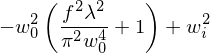

In [67]:
expr = w_i**2 - w_0**2*(1+((Lam*f)/(sp.pi*w_0**2))**2)
expr

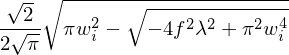

In [65]:
res = sp.solve(expr, w_0)
res[1]

$$
\sqrt{\pi^2 w_i^4 - 4f^2\lambda^2} = \pi w_i^2 \sqrt{1 - \frac{4f^2\lambda^2}{\pi^2 w_i^4}}
$$
for $2\lambda \ll \pi w_i^2$, this gives:

$$
\pi w_i^2 (1-\frac{2f^2\lambda^2}{\pi^2 w_i^4})
$$
so

$$
w_0=\frac{\sqrt{2}}{2\sqrt{\pi}}\sqrt{\frac{2f^2\lambda^2}{\pi w_i^2}} = \frac{f\lambda}{\pi w_i}
$$

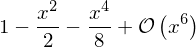

In [69]:
x=sp.symbols('x')
sp.series(sp.sqrt(1-x**2),x0=0)

In [71]:
sp.N(res[1].subs([(w_i, 1e-3), (f,0.01), (Lam, 0.85e-6)]))

In [70]:
(0.01*0.85e-6)/(np.pi*1e-3)

In [79]:
def finWaist(f, wi, waveLength):
    return f*waveLength/(np.pi*wi)

In [154]:
import AnalysisHelpers as ah

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


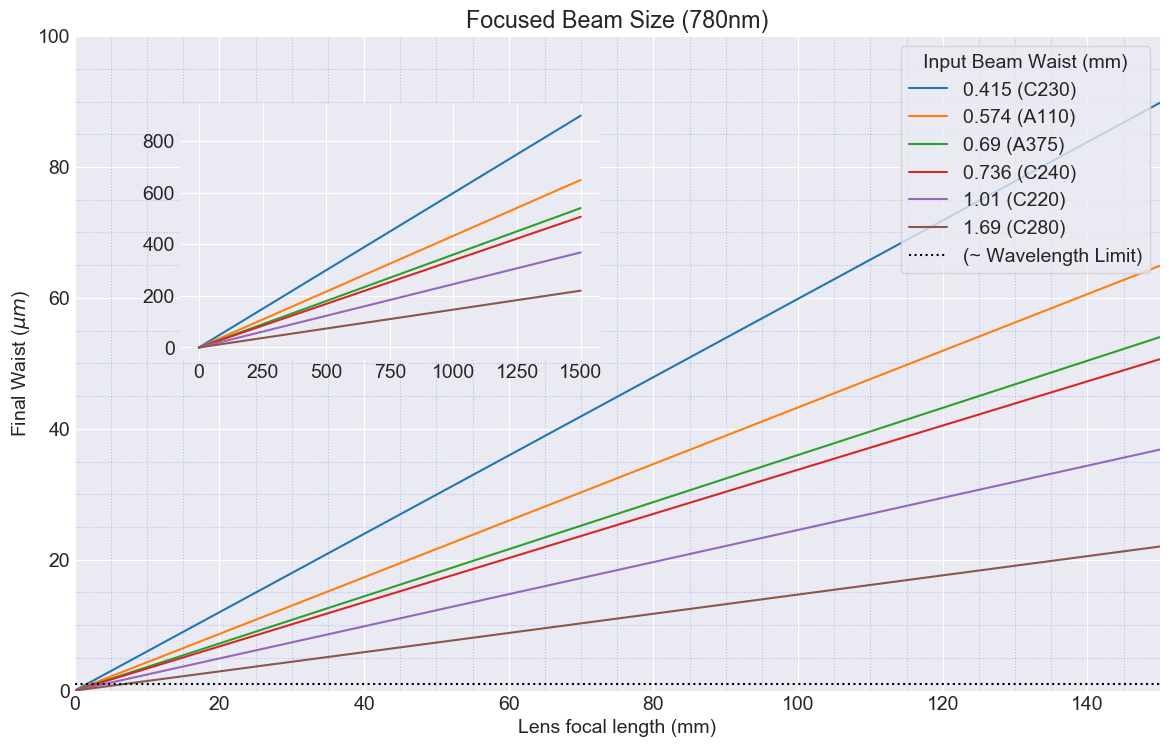

In [191]:
fig, ax = subplots()
focalLengths = np.linspace(0,0.15,1000)
long_focalLengths = np.linspace(0,1.5,1000)
left, bottom, width, height = [0.2, 0.5, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
#long_focalLengths
# calculate the focused waist given some standard initial waists set by collimating lenses

lensNames = ['C280', 'C240', 'C230', 'C220', 'A110', 'A375']
collimators = [C280_f, C240_f, C230_f, C220_f, A110_f, A375_f]
lensNames, collimators, _ = ah.orderData(lensNames, collimators)

for collimator, name in zip(collimators, lensNames):
    inputWaist = collimatedWaist(collimator)
    finWaists780 = finWaist(focalLengths, inputWaist, 780e-9)
    long_finWaists780 = finWaist(long_focalLengths, inputWaist, 780e-9)
    ax.plot(focalLengths*1e3, finWaists780*1e6,label=str(misc.round_sig(inputWaist*1e3)) + ' (' + name + ')')
    ax2.plot(long_focalLengths*1e3, long_finWaists780*1e6)

ax.set_ylabel(r'Final Waist ($\mu m$)')

ax.set_xlabel('Lens focal length (mm)')
ax.axhline(1,color='k',linestyle=':', label='(~ Wavelength Limit)')
ax.set_xlim(0,max(focalLengths)*1e3)
ax.set_ylim(0,100)
ax.legend(loc='upper right', fancybox=True, framealpha=0.8, frameon=True, title='Input Beam Waist (mm)')
ax.set_title('Focused Beam Size (780nm)')
ax.grid(True, which='minor', color='b', linestyle=':',alpha=0.2)
ax.minorticks_on()